In [32]:
pip install --upgrade yfinance

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical data (adjust the start and end dates as needed)
df = tesla.history(start="2020-01-01", end="2024-01-01")

In [34]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0


Checking for null values in the data.

In [35]:
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [36]:
df.drop_duplicates(inplace=True)

**Time Series Plot**

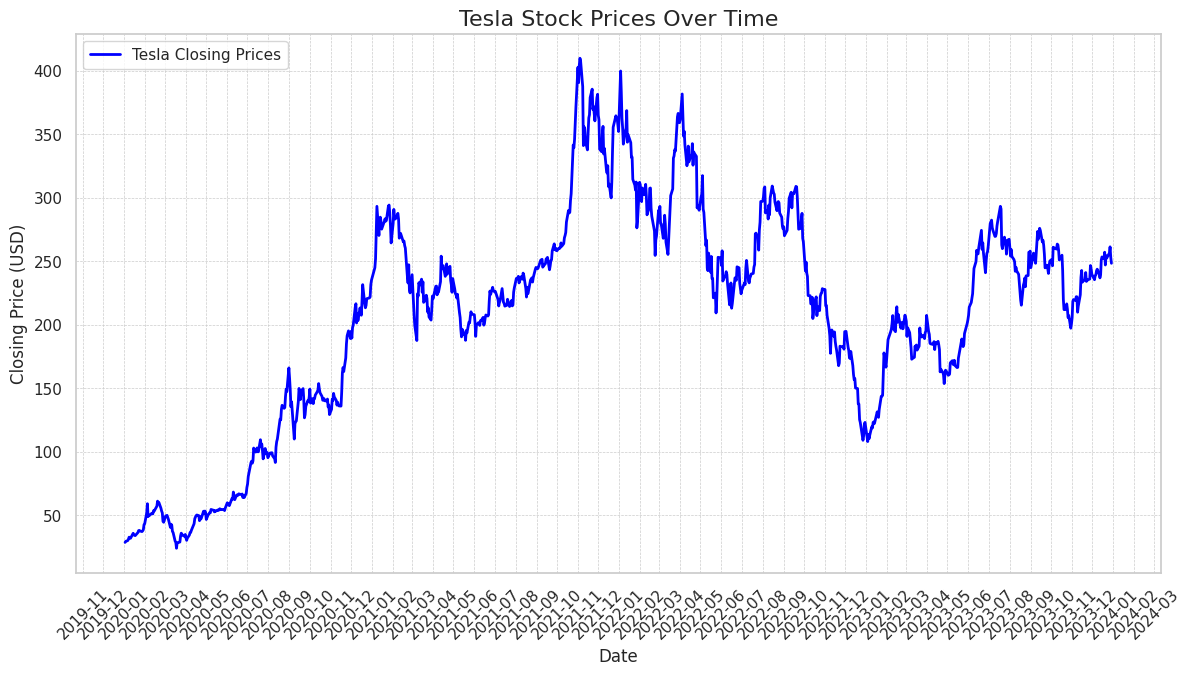

In [37]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Tesla Closing Prices', color='blue', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Tesla Stock Prices Over Time', fontsize=16)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

**Simple Moving Average (SMA) Trend Analysis**   

A Simple Moving Average (SMA) is calculated by averaging a set number of past data points in a time series to smooth out short-term fluctuations and highlight longer-term trends.

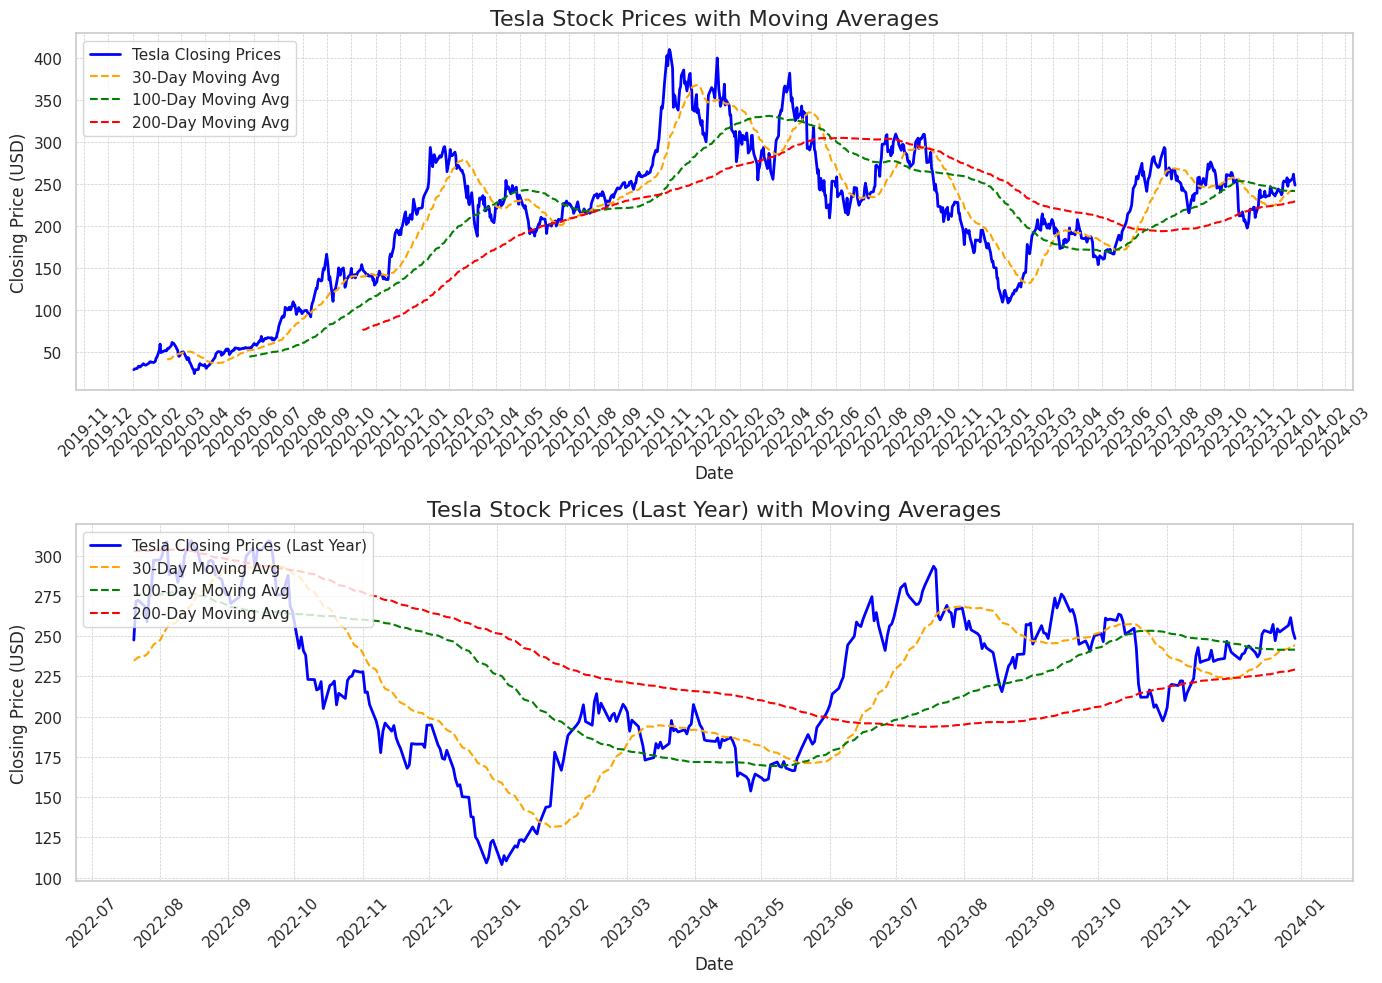

In [38]:
plt.figure(figsize=(14, 10))

# First subplot: Tesla closing prices with moving averages
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Tesla Closing Prices', color='blue', linewidth=2)
plt.plot(df.index, df['Close'].rolling(window=30).mean(), label='30-Day Moving Avg', color='orange', linestyle='--', linewidth=1.5)
plt.plot(df.index, df['Close'].rolling(window=100).mean(), label='100-Day Moving Avg', color='green', linestyle='--', linewidth=1.5)
plt.plot(df.index, df['Close'].rolling(window=200).mean(), label='200-Day Moving Avg', color='red', linestyle='--', linewidth=1.5)

# Adding labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Tesla Stock Prices with Moving Averages', fontsize=16)
plt.legend(loc='upper left')

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatting the x-axis to show dates more clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Second subplot: Tesla closing prices (zoomed into the last year)
plt.subplot(2, 1, 2)
plt.plot(df.index[-365:], df['Close'][-365:], label='Tesla Closing Prices (Last Year)', color='blue', linewidth=2)
plt.plot(df.index[-365:], df['Close'].rolling(window=30).mean()[-365:], label='30-Day Moving Avg', color='orange', linestyle='--', linewidth=1.5)
plt.plot(df.index[-365:], df['Close'].rolling(window=100).mean()[-365:], label='100-Day Moving Avg', color='green', linestyle='--', linewidth=1.5)
plt.plot(df.index[-365:], df['Close'].rolling(window=200).mean()[-365:], label='200-Day Moving Avg', color='red', linestyle='--', linewidth=1.5)

# Adding labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Tesla Stock Prices (Last Year) with Moving Averages', fontsize=16)
plt.legend(loc='upper left')

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatting the x-axis to show dates more clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Displaying the plot
plt.show()

**Volatility Analysis**


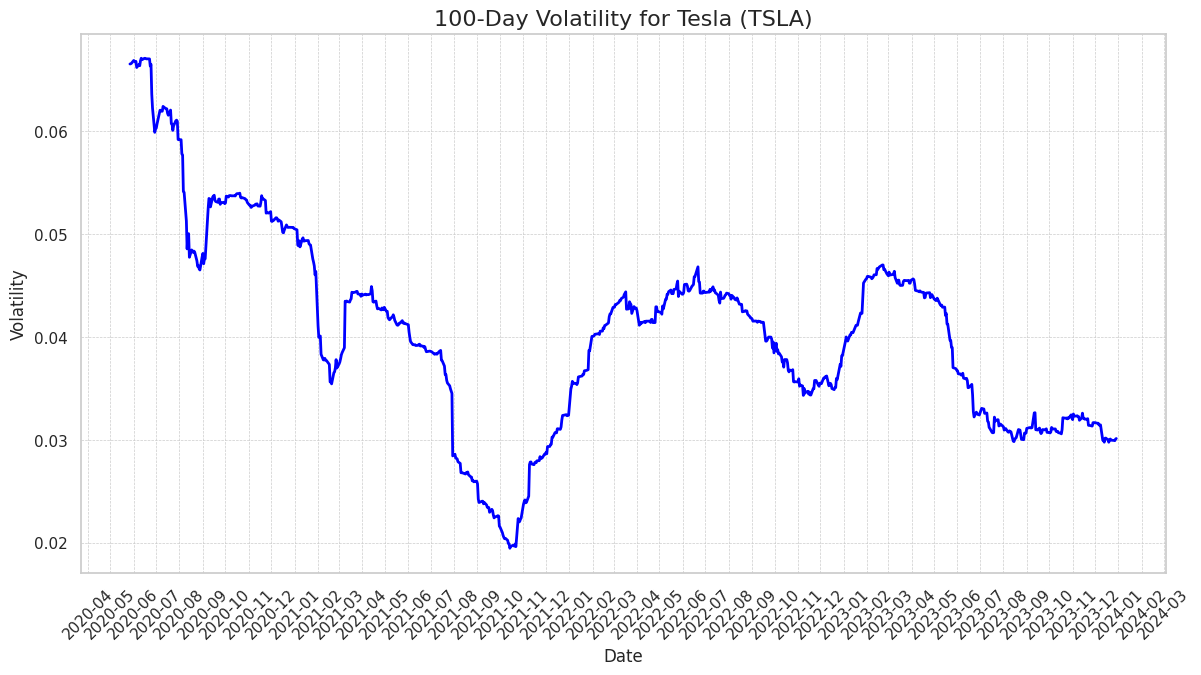

In [39]:
# Calculate daily returns
df['Daily_Returns'] = df['Close'].pct_change()

# Calculate 100-day volatility (standard deviation of returns)
df['100-Day Volatility'] = df['Daily_Returns'].rolling(window=100).std()

# Plotting the 100-day volatility
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['100-Day Volatility'], color='blue', linewidth=2)

# Adding labels, title, and grid
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('100-Day Volatility for Tesla (TSLA)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatting the x-axis to show dates more clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

**Seasonality Analysis**

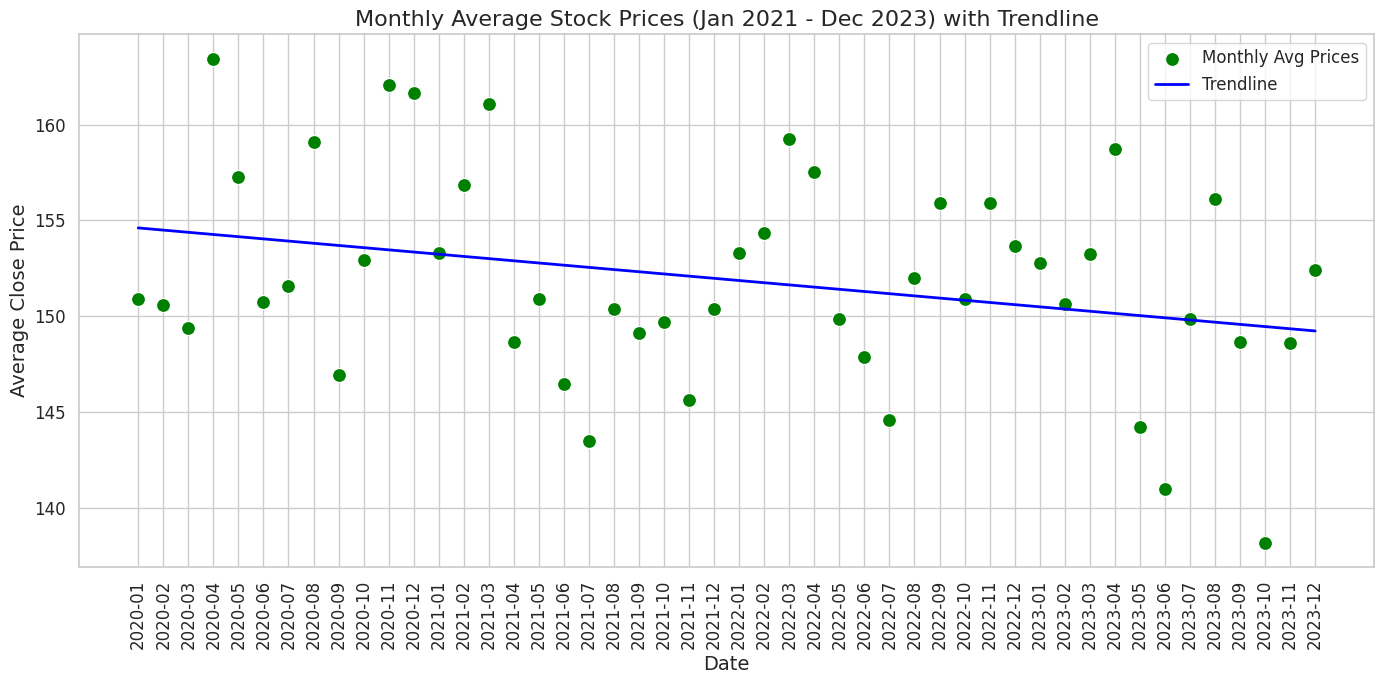

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation for demonstration purposes
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
close_prices = np.random.uniform(low=100, high=200, size=len(dates))

data = pd.DataFrame({
    'Date': dates,
    'Close': close_prices
})
data.set_index('Date', inplace=True)

# Resample the data to get monthly averages
monthly_avg = data['Close'].resample('M').mean()

# Extracting month and year for scatter plot
monthly_avg.index = monthly_avg.index.strftime('%Y-%m')

# Creating x and y values for the trendline
x_values = np.arange(len(monthly_avg))
y_values = monthly_avg.values

# Calculate linear regression (trendline)
coefficients = np.polyfit(x_values, y_values, 1)
trendline = coefficients[0] * x_values + coefficients[1]

# Set up the plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plotting the scatter plot of monthly average stock prices
sns.scatterplot(x=monthly_avg.index, y=monthly_avg.values, color='green', s=100, label='Monthly Avg Prices')

# Plotting the trendline
plt.plot(monthly_avg.index, trendline, color='blue', label='Trendline', linewidth=2)

# Adding title and labels
plt.title('Monthly Average Stock Prices (Jan 2021 - Dec 2023) with Trendline', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Price Prediction**

In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta

# Download stock data from yfinance
ticker = 'AAPL'  # Example ticker
start_date = '2021-01-01'
end_date = '2023-12-31'
df = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' prices and reshape for scaling
close_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Prepare the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the number of time steps to consider for prediction
time_steps = 60
X, y = create_dataset(scaled_close_prices, time_step=time_steps)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Predict the next month's stock prices
last_month_data = scaled_close_prices[-time_steps:]
last_month_data = last_month_data.reshape(1, time_steps, 1)

predicted_prices = []
for _ in range(30):  # Predicting 30 days (1 month) ahead
    prediction = model.predict(last_month_data)
    predicted_prices.append(prediction[0, 0])
    last_month_data = np.append(last_month_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices to the original scale
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Generate dates for the next month
last_date = df.index[-1]  # Assuming the index contains date information
predicted_dates = [last_date + pd.DateOffset(days=i) for i in range(1, 31)]

# Create a DataFrame for predicted prices and dates
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted Close': predicted_prices.flatten()})

# Display the predicted DataFrame
print(predicted_df)


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.1452
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0119
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0065
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0051
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0051
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0046
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0047
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0040
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0043
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0042
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0035
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0038
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0031
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0036
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/ste

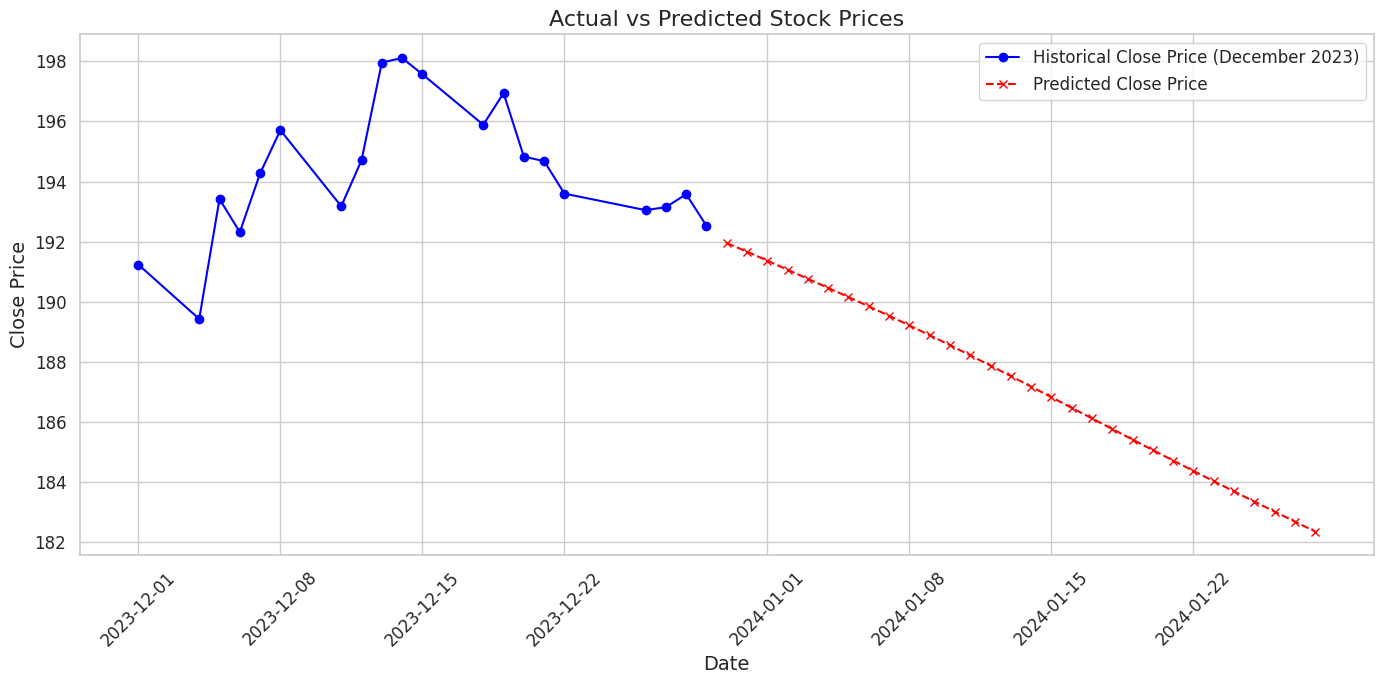

In [42]:
import matplotlib.pyplot as plt

# Filter historical data for December 2023
december_2023_data = df[(df.index.month == 12) & (df.index.year == 2023)]

# Set up the plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plotting the historical data for December 2023
plt.plot(december_2023_data.index, december_2023_data['Close'], label='Historical Close Price (December 2023)', color='blue', marker='o')

# Plotting the predicted prices for the next month
plt.plot(predicted_df['Date'], predicted_df['Predicted Close'], label='Predicted Close Price', color='red', linestyle='--', marker='x')

# Adding title and labels
plt.title('Actual vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Time Series Plot with Rolling Mean**

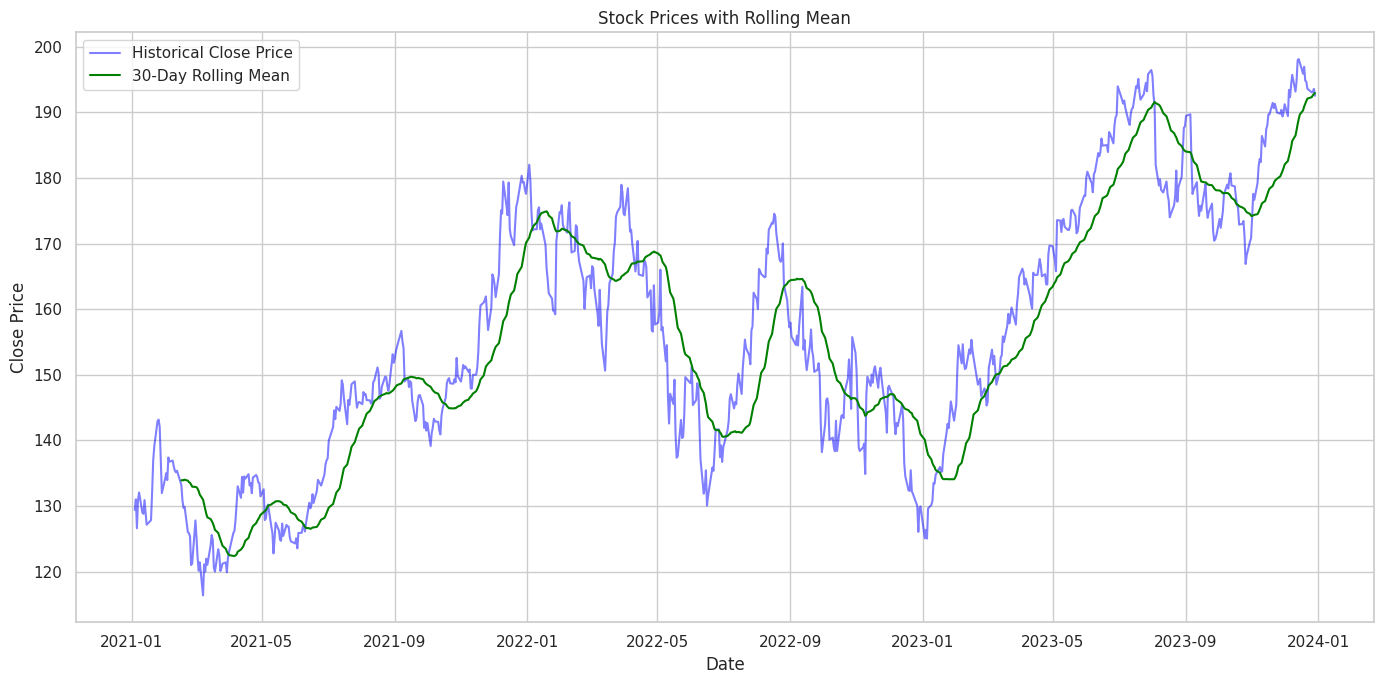

In [43]:
# Calculate rolling mean
rolling_mean = df['Close'].rolling(window=30).mean()

# Set up the plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Close Price', color='blue', alpha=0.5)
plt.plot(df.index, rolling_mean, label='30-Day Rolling Mean', color='green')
plt.title('Stock Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Training and Validation Loss Plot**

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0011 - val_loss: 6.9539e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0011 - val_loss: 8.6006e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0011 - val_loss: 8.1414e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0012 - val_loss: 8.7008e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0013 - val_loss: 7.1936e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013 - val_loss: 9.3357e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0013 - val_loss: 6.9884e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0013 - val_loss: 7.2360e-04
Epoch 12/100
18/18 

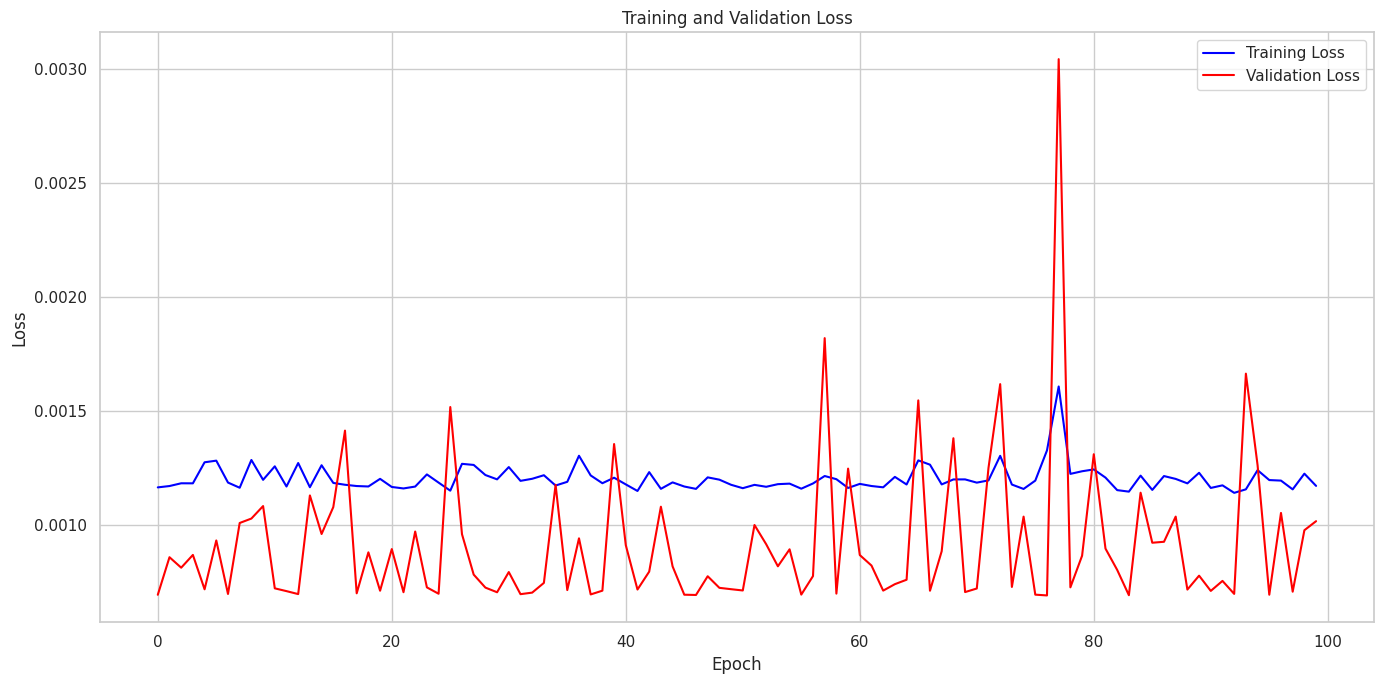

In [44]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Forecast vs Actual Prices Plot**

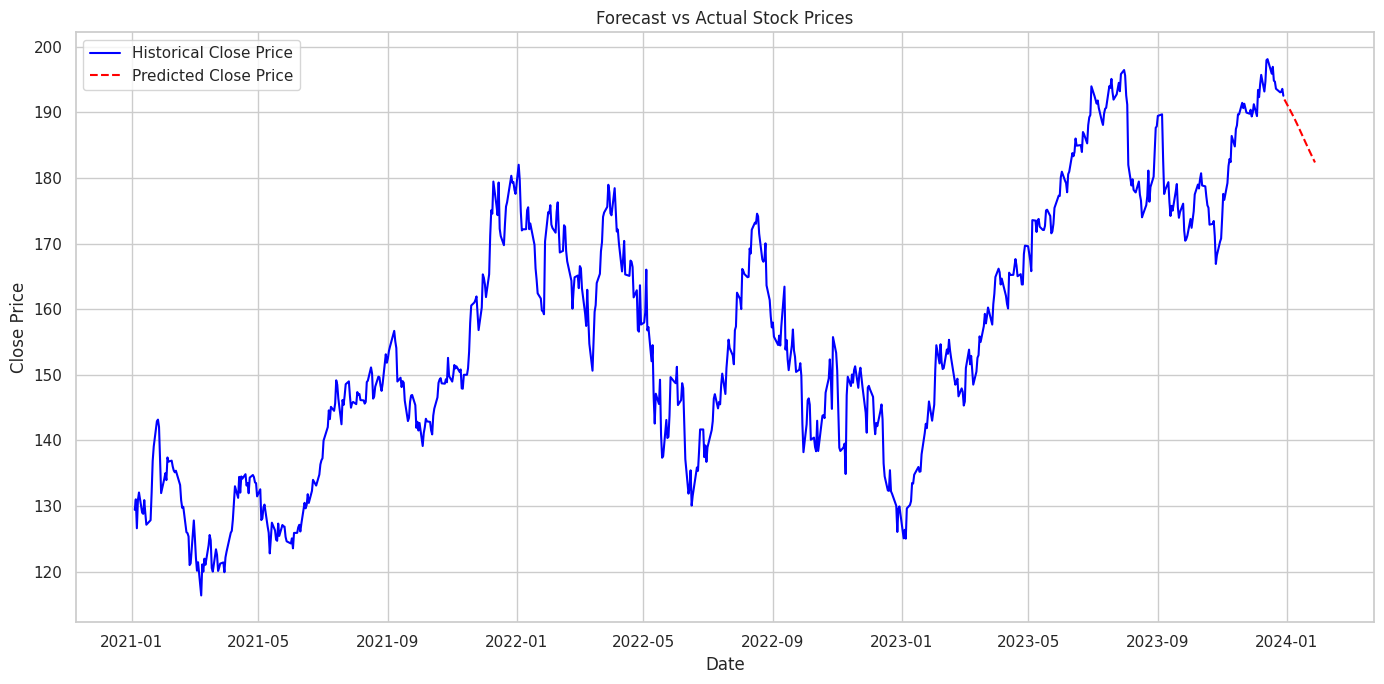

In [45]:
# Combine historical data with predictions for comparison
combined_df = pd.concat([df[['Close']], predicted_df.set_index('Date')], axis=1)
combined_df.columns = ['Historical Close', 'Predicted Close']

# Set up the plot
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Historical Close'], label='Historical Close Price', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Close'], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Forecast vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Correlation Plot**

[*********************100%%**********************]  4 of 4 completed


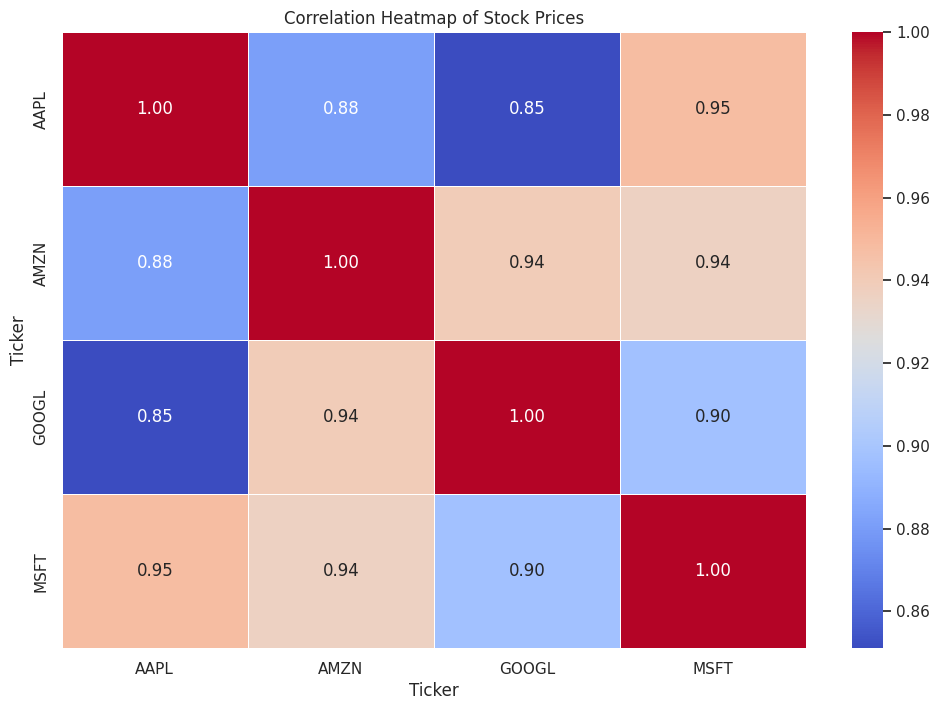

In [46]:
import seaborn as sns

# Example: Correlation heatmap for multiple stocks
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')['Close']

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()


**Stock Price Distribution Plot**

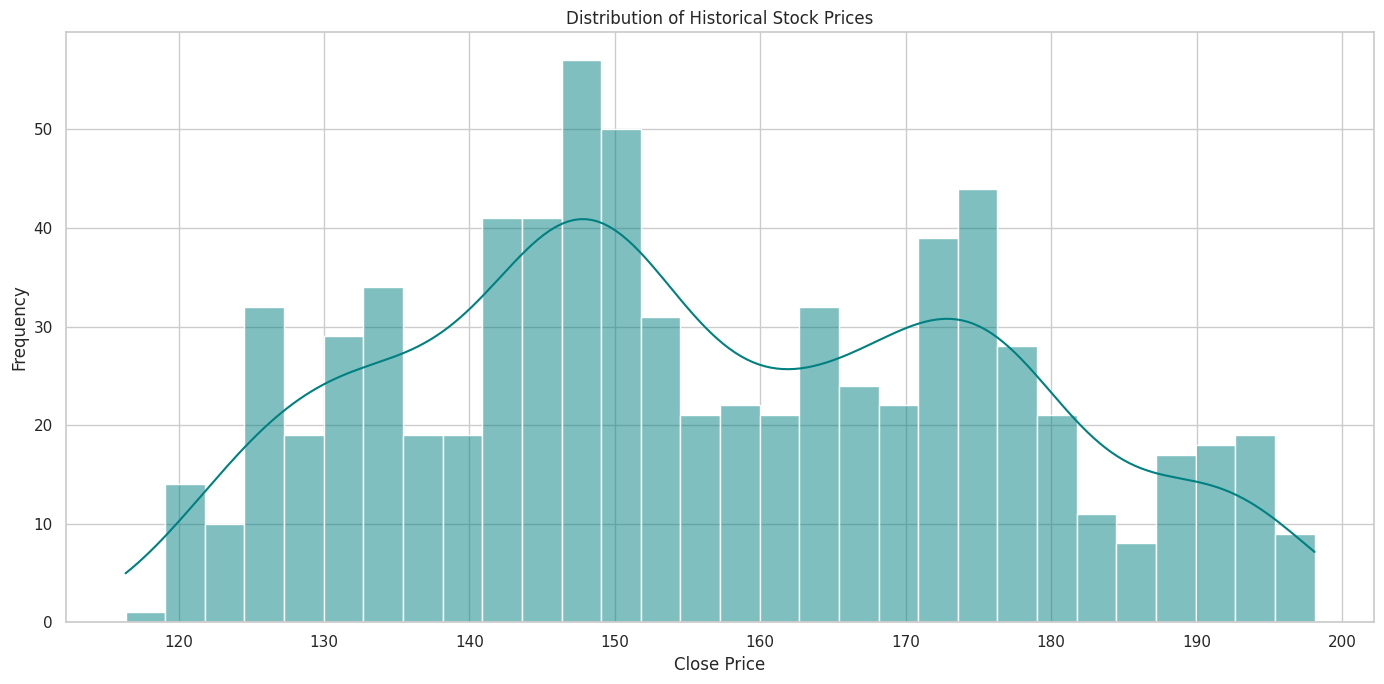

In [47]:
# Plot the distribution of historical stock prices
plt.figure(figsize=(14, 7))
sns.histplot(df['Close'], bins=30, kde=True, color='teal')
plt.title('Distribution of Historical Stock Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
